In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

def exp(x, N, t, C):
    """
    Exponential function to fit the data with uniform background.
    :param x: x values
    :param N: Amplitude
    :param t: Decay constant in 1/us
    :param C: Background constant
    """
    return N * np.exp(-x/t) + C

# Exp. Muon Data Analysis

### Reading the data

In [ ]:
# Read in data (https://drive.google.com/drive/folders/1gEXcQ7vt2-g9hFsCkuCPHfhVXzkUG1NC?usp=drive_link)
data1 = pd.read_csv('muon_accumulation_10_17_to_10_23_2024.data', sep=' ', header=None, names=['dt', 'time'], dtype={'dt': np.float64, 'time': np.int64})
data2 = pd.read_csv('muon_accumulation_10_23_to_10_29_2024.data', sep=' ', header=None, names=['dt', 'time'], dtype={'dt': np.float64, 'time': np.int64})
data3 = pd.read_csv('muon_accumulation_10_31_to_11_5_2024.data', sep=' ', header=None, names=['dt', 'time'], dtype={'dt': np.float64, 'time': np.int64})
data4 = pd.read_csv('muon_accumulation_11_7_to_11_12_2024.data', sep=' ', header=None, names=['dt', 'time'], dtype={'dt': np.float64, 'time': np.int64})


# # Time cuts to the data
data1 = data1[(data1['time']- data1['time'].min())>30*60*60]
data2 = data2[(data2['time']- data2['time'].min())<115*60*60]
data3 = data3[(data3['time']- data3['time'].min())>15*60*60]
data4 = data4[(data4['time']- data4['time'].min())>20*60*60]

# Exclude data2
data = pd.concat([data1,data3,data4])


### Fit and Plot

[4.65007371e+03 2.07173049e+00 1.57509625e+02]
[4.50688843e+01 1.91966472e-02 2.41850515e+00]


(0.0, 20.0)

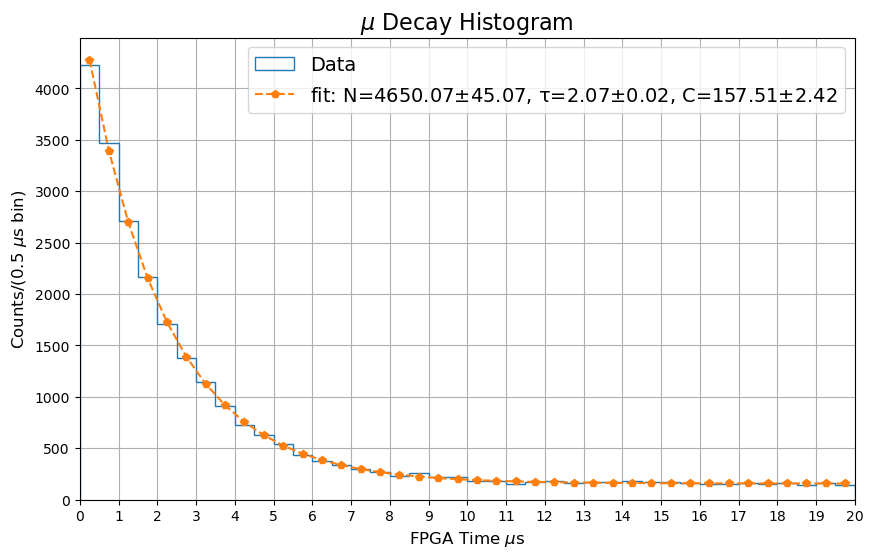

In [3]:
plt.figure(figsize=(10, 6))
hist = plt.hist(data['dt'][data['dt']<20000]/1000, bins=40, histtype='step', range = (0, 20), linewidth=1, label='Data')

x = hist[1][1:] - 0.25  # middle of bins
y = hist[0]

# Fit the data
popt, pcov = curve_fit(exp, x, y, p0=[5000, 2.12,100], sigma=np.sqrt(y), absolute_sigma=False)

# Print the fit parameters
print(popt)
print(np.sqrt(np.diag(pcov)))



# # Plot the data expected observed lifetime
# t=2.12
# plt.plot(x, exp_no_bg(x, *popt), 'p--', label=f'fit: N={popt[0]:.2f}$\pm${np.sqrt(np.diag(pcov))[0]:.2f}, τ={popt[1]:.2f}$\pm${np.sqrt(np.diag(pcov))[1]:.2f}')

# Plot the fit
plt.plot(x, exp(x, *popt), 'p--', label=f'fit: N={popt[0]:.2f}$\pm${np.sqrt(np.diag(pcov))[0]:.2f}, τ={popt[1]:.2f}$\pm${np.sqrt(np.diag(pcov))[1]:.2f}, C={popt[2]:.2f}$\pm${np.sqrt(np.diag(pcov))[2]:.2f}')

# Format plot
plt.xticks(np.arange(0, 21, 1));
plt.grid()
plt.xlabel('FPGA Time $\mu$s',fontsize=12)
plt.ylabel('Counts/(0.5 $\mu$s bin)', fontsize=12)
plt.legend(fontsize=14)
plt.title("$\mu$ Decay Histogram", fontsize=16)
plt.xlim(0, 20)
# plt.savefig('muonPHY451_figFINAL.jpg', dpi=400)

### Checking for Anomalies

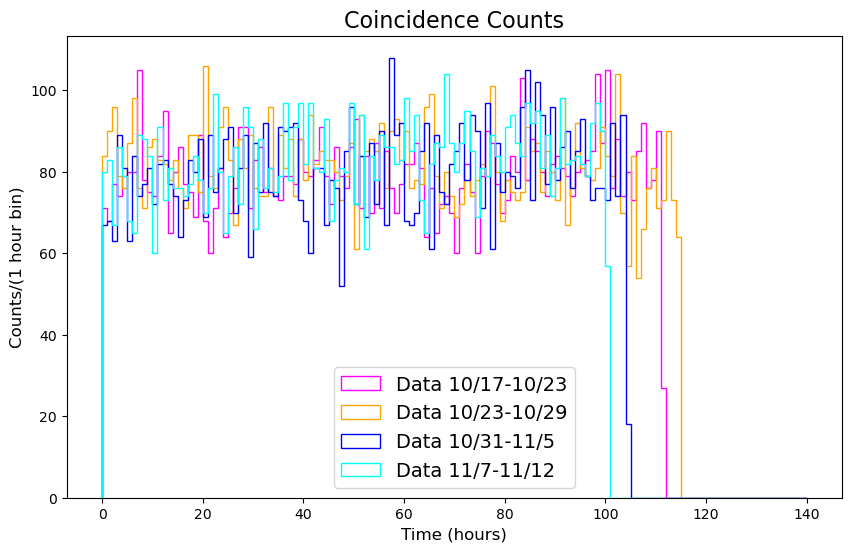

In [4]:
# See if count flux is constant with time
plt.figure(figsize=(10, 6))

colors = ['magenta', 'orange', 'b', 'cyan']
names = ['10/17-10/23', '10/23-10/29', '10/31-11/5', '11/7-11/12']
for i, data in enumerate([data1,data2,data3,data4]):
    data['time'] = data['time']- data['time'].min()
    gate = data['dt']<20000 # change this to change the time gate
    plt.hist(data['time'][gate]/60/60, bins=140, histtype='step', linewidth=1, label=f'Data {names[i]}', color=colors[i],range = (0, 140))
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Counts/(1 hour bin)', fontsize=12)
plt.title('Coincidence Counts', fontsize=16)
plt.legend(fontsize=14)
# plt.savefig('muonPHY451_coincidence.jpg', dpi=400)

# Extrapolating Muon Ratio $\mu^+/\mu^-$ 

[Measurements of Primary and Atmospheric Cosmic-Ray Spectra with the BESS-TeV Spectrometer 2004](http://arxiv.org/abs/astro-ph/0403704v1)


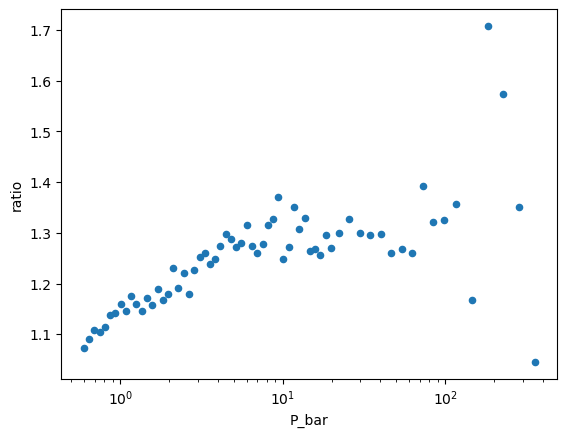

<Figure size 640x480 with 0 Axes>

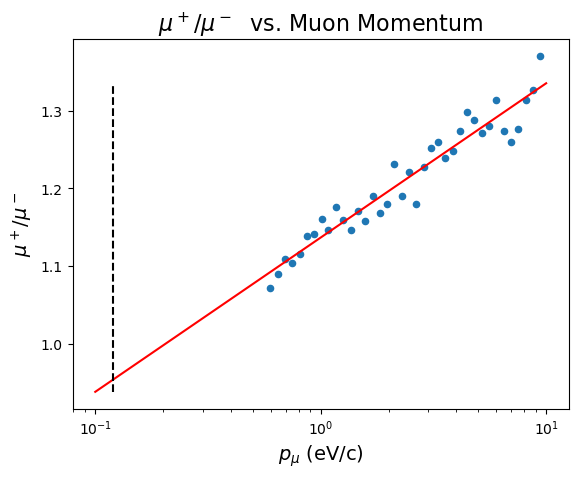

In [ ]:
# Read in data
# data = np.loadtxt('24-10-17-11-11.data')
ratio_data = pd.read_csv('muon_flux.txt', sep=' ', header=None, names=['P_bar_+', 'muon_+', 'P_bar_-', 'muon_-'])
ratio_data['P_bar'] = (ratio_data['P_bar_+'] + ratio_data['P_bar_-']) / 2
ratio_data['ratio'] = ratio_data['muon_+'] / ratio_data['muon_-']

ratio_data.plot(x='P_bar', y='ratio', kind='scatter', logy=False, logx=True)

mask = ratio_data['P_bar'] < 10

plt.figure()
ratio_data[mask].plot(x='P_bar', y='ratio', kind='scatter', logy=False, logx=True)

def log_func(x, a, b):
    return a * np.log(x) + b

params, cov = curve_fit(log_func, ratio_data[mask]['P_bar'], ratio_data[mask]['ratio'])
plt.title("$\mu^+/\mu^-$  vs. Muon Momentum", fontsize=16)
plt.xlabel("$p_\mu$ (eV/c)", fontsize=14)
plt.ylabel("$\mu^+/\mu^-$", fontsize=14)
#plt.plot(ratio_data[mask]['P_bar'], log_func(ratio_data[mask]['P_bar'], *params), 'r-')
x = np.linspace(0.1, 10, 100)
plt.plot(x, log_func(x, *params), 'r-')
plt.vlines(0.12011, log_func(0.1, *params), log_func(10, *params), 'k', '--')
# plt.savefig('muon_PH451_fig9.jpg', dpi=400)

# Analyizing Residuals

(0.0, 20.0)

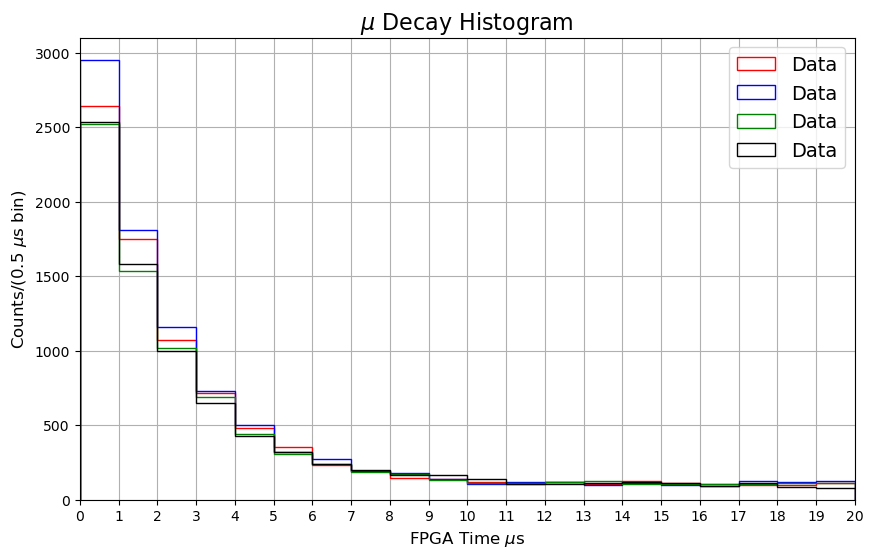

In [6]:
plt.figure(figsize=(10, 6))
hist1 = plt.hist(data1['dt'][data1['dt']<20000]/1000, bins=20, histtype='step', range = (0, 20), linewidth=1, label='Data', color="red")
hist2 = plt.hist(data2['dt'][data2['dt']<20000]/1000, bins=20, histtype='step', range = (0, 20), linewidth=1, label='Data', color="blue")
hist3 = plt.hist(data3['dt'][data3['dt']<20000]/1000, bins=20, histtype='step', range = (0, 20), linewidth=1, label='Data', color="green")
hist4 = plt.hist(data4['dt'][data4['dt']<20000]/1000, bins=20, histtype='step', range = (0, 20), linewidth=1, label='Data', color="black")
plt.xticks(np.arange(0, 21, 1));
plt.grid()
plt.xlabel('FPGA Time $\mu$s',fontsize=12)
plt.ylabel('Counts/(0.5 $\mu$s bin)', fontsize=12)
plt.legend(fontsize=14)
plt.title("$\mu$ Decay Histogram", fontsize=16)
plt.xlim(0, 20)

In [7]:
normed_hist1 = hist1[0]/np.sum(hist1[0])
normed_hist2 = hist2[0]/np.sum(hist2[0])
normed_hist3 = hist3[0]/np.sum(hist3[0])
normed_hist4 = hist4[0]/np.sum(hist4[0])

Text(0.5, 1.0, 'Residuals Between Datasets')

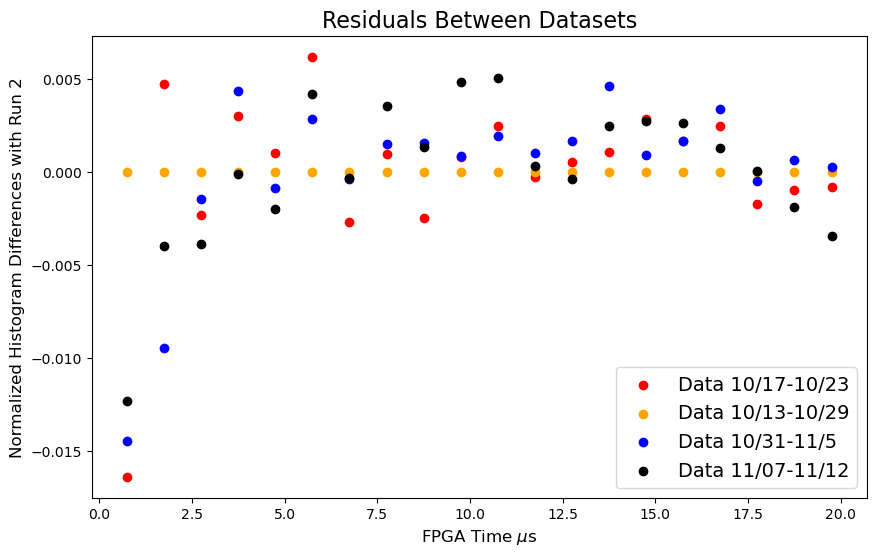

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(hist1[1][1:]-0.25, normed_hist1-normed_hist2, color="red", label="Data 10/17-10/23")
plt.scatter(hist2[1][1:]-0.25, normed_hist2-normed_hist2, color="orange", label="Data 10/13-10/29")
plt.scatter(hist3[1][1:]-0.25, normed_hist3-normed_hist2, color="blue", label="Data 10/31-11/5")
plt.scatter(hist4[1][1:]-0.25, normed_hist4-normed_hist2, color="black", label="Data 11/07-11/12")
plt.xlabel('FPGA Time $\mu$s',fontsize=12)
plt.ylabel('Normalized Histogram Differences with Run 2', fontsize=12)
plt.legend(fontsize=14)
plt.title("Residuals Between Datasets", fontsize=16)
# plt.savefig("1114.jpg", dpi=400)

Text(0, 0.5, 'Normalized Histogram Differences with Run 4')

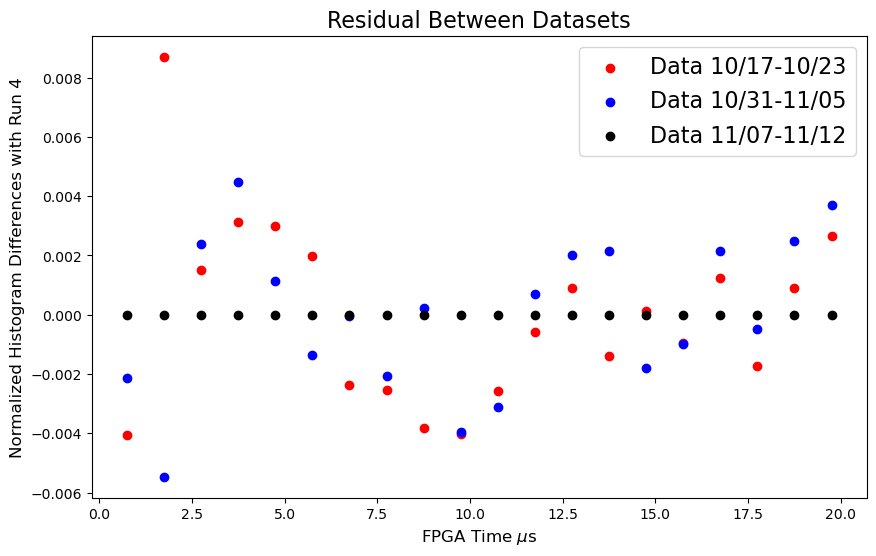

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(hist1[1][1:]-0.25, normed_hist1-normed_hist4, color="red", label="Data 10/17-10/23")
#plt.scatter(hist2[1][1:]-0.25, normed_hist2-normed_hist4, color="blue", label="Data 10/23-10/29")
plt.scatter(hist3[1][1:]-0.25, normed_hist3-normed_hist4, color="blue", label="Data 10/31-11/05")
plt.scatter(hist4[1][1:]-0.25, normed_hist4-normed_hist4, color="black", label="Data 11/07-11/12")
plt.legend(fontsize=16)
plt.title("Residual Between Datasets", fontsize=16)
plt.xlabel('FPGA Time $\mu$s',fontsize=12)
plt.ylabel('Normalized Histogram Differences with Run 4', fontsize=12)
# plt.savefig("clean_residual.jpg", dpi=400)

# Code Graveyard

In [10]:
# # ratio = log_func(0.12011, *params)
# ratio = 1.15
# # print(ratio)
# def t_obs(t_pos,t_neg,ratio):
#     return (1+ratio)*(t_neg * t_pos)/(t_pos + ratio*t_neg)


# def ratio_obs(t_pos,t_neg,t_obs):
#     return (t_neg-t_obs)/(t_pos - t_obs) * -t_pos/t_neg


# def t_pos(t_neg, t_obs, ratio):
#     return ratio/((1/t_obs)*(1+ratio)-(1/t_neg))


# # print("Muon lifetime:",t_pos(2.028, popt[1], 1.28))
# # print(f"Sigma minus {t_pos(2.028, np.sqrt(np.diag(pcov)[1])+popt[1], 1.28):.2f}")
# # print(f"Sigma plus B) {t_pos(2.028, -np.sqrt(np.diag(pcov)[1])+popt[1], 1.28):.2f}")


# # # print(t_obs(2.2, 2.0280, 1.33))
# # # print(ratio_obs(2.197, 2.028, 2.123))
# # # print(params)

# # ratios = np.linspace(0.9, 1.5, 100)
# # t_obs_vals = np.linspace(2.04, 2.12, 100)
# # plt.plot(t_obs_vals, t_pos(2.028, t_obs_vals, 1.35))

# # t_obs(2.197, 2.028, 1.3)

# # ratio_obs(2.197, 2.028, 2.07173049)

# t_pos(2.028,2.07, 1.28)


### Naive Simulation of Data

In [11]:
# def simulate_data_exp(sims, N, t, C, noise=0.1):
    #     """
    #     Simulate data with exponential decay and uniform background.
    #     :param sims: Number of simulations
    #     :param N: Amplitude
    #     :param t: Decay constant
    #     :param C: Background constant
    #     :param noise: Noise level
    #     """
    #     x = np.linspace(0, 20, sims)
    #     y = exp(x, N, t, C)
    #     y += noise * np.random.randn(sims)
    #     return x, y


    # # Simulate data
    # t = 2.2 # Decay constant in 1/us
    # x, y = simulate_data_exp(100, 5, t, 1)

    # # Fit the data
    # popt, pcov = curve_fit(exp, x, y, p0=[5, 1, 1])

    # plt.plot(x, y, 'o', label='simulation data')
    # plt.plot(x, exp(x, *popt), 'r-', label='fit: N=%5.3f, t=%5.3f, C=%5.3f' % tuple(popt))
    # plt.xlabel('$\mu s$')
    # plt.ylabel('Counts/$\mu s$')
    # plt.legend()
    # plt.show()

### Figure 6... Histogram not centered

In [12]:
# plt.figure(figsize=(10, 6))
# hist = plt.hist(data['dt'][data['dt']<20000]/1000, bins=20, histtype='step', range = (0, 20), linewidth=1)
# plt.xticks(np.arange(0, 21, 1));

# plt.grid()

# # Plot the data using literature value of 2.2 us
# t = 2.2 # Decay constant in 1/us
# plt.plot(np.linspace(0, 20, 100), exp(np.linspace(0, 20, 100), np.max(hist[0]), t, 0), 'r-', label='Ideal curve $τ = 2.2\mu$s')
# plt.title("$\mu$ Decay Histogram", fontsize=16)
# plt.xlabel('FPGA Time $\mu$s',fontsize=12)
# plt.ylabel('Counts/(1 $\mu$s bin)', fontsize=12)
# plt.legend(fontsize=14)
# # plt.show()
# # plt.savefig('muonPHY451_fig6.jpg', dpi=400)
